# Analyse

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import signal


In [ ]:
df = pd.read_parquet('backup.parquet')

In [38]:
print(df.shape)

(78898530, 14)


In [49]:
df_log = pd.read_excel("experiment.xlsx")
df_log.iloc[35:42]

,Experiment No,Piece No,Material,Timestamp Start,Timestamp End,Time Diff,Material thickness (mm),Feed Rate,Band Speed,Setup Code (for the machine operator),Avg Current,Result,Comments,Photo of the setup,Loop 1,Unnamed: 15,Unnamed: 16
35,35.0,5.0,steel,21:03:13,21:04:12,00:00:59,27.7,53.0,56.0,7.0,2.86,Success,NaN,NaN,NaN,NaN,0.16
36,36.0,5.0,steel,21:06:05,21:07:26,00:01:21,27.7,39.0,41.0,1.0,2.13,Success,NaN,NaN,NaN,NaN,0.03
37,37.0,0.0,No Piece,21:12:55,21:14:25,00:01:30,0.0,25.0,26.0,0.0,NaN,Success,Change from setap 6 to 1 during the cutting pr...,NaN,Loop Test,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,38.0,5.0,steel,21:16:54,21:18:44,00:01:50,27.7,25.0,26.0,0.0,0.8,Success,Change from setap 6 to 1 during the cutting pr...,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,41.0,NaN,2.25,NaN,NaN,NaN,NaN,NaN,NaN
41,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_log.columns

Index(['Experiment No', 'Piece No', 'Material', 'Timestamp Start',
       'Timestamp End', 'Time Diff', 'Material thickness (mm)', 'Feed Rate',
       'Band Speed', 'Setup Code (for the machine operator)', 'Avg Current',
       'Result ', 'Comments', 'Photo of the setup', 'Loop 1', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [51]:
column_mapping = {
    'Experiment No': 'exp_no',
    'Material': 'material',
    'Material thickness (mm)': 'thickness',
    'Feed Rate': 'feed_input',
    'Band Speed': 'band_speed_input',
    'Time Diff': 'raw_duration',
    'Result ': 'result',
    'Comments': 'comments'
}

df_log = df_log[column_mapping.keys()].rename(columns=column_mapping)

df_log['comments'] = df_log['comments'].fillna('')
df_log = df_log.dropna()

df_log['exp_no'] = df_log['exp_no'].astype(int)

def convert_to_seconds(val):
    try:
        return pd.to_timedelta(str(val)).total_seconds()
    except:
        if hasattr(val, 'hour'):
            return val.hour * 3600 + val.minute * 60 + val.second
        return 0

df_log['expected_duration_sec'] = df_log['raw_duration'].apply(convert_to_seconds)

df_log

,exp_no,material,thickness,feed_input,band_speed_input,raw_duration,result,comments,expected_duration_sec
0,1,steel,29.2,39.0,41.0,00:00:52,Success,Vibration Sensor moved closer to the saw,52.0
1,2,steel,29.2,25.0,41.0,00:01:09,Success,,69.0
2,3,steel,29.2,53.0,41.0,00:00:34,Success,,34.0
3,4,steel,29.2,39.0,26.0,00:00:33,Success,"Same thickness, different length of the piece....",33.0
4,5,steel,29.2,39.0,56.0,00:00:32,Success,"Same thickness, different length of the piece",32.0
5,6,steel,26.0,25.0,26.0,00:01:23,Success,Way more quiet than previous ones,83.0
6,7,steel,26.0,53.0,56.0,00:00:39,Success,,39.0
7,8,steel,26.0,25.0,56.0,00:01:20,Success,,80.0
8,9,steel,26.0,53.0,26.0,00:00:38,Success,,38.0
9,10,steel,11.0,39.0,41.0,00:01:09,Success,,69.0


In [42]:
diff = df[df["time"] > pd.Timestamp('2005-12-31')]["time"].min() - df["time"].min()
diff

Timedelta('8103 days 14:04:04')

In [43]:
mask = df["time"] < pd.Timestamp('2005-01-01')

df.loc[mask, "time"] = df.loc[mask, "time"] + diff

In [58]:
df = df.set_index('time')

KeyError: "None of ['time'] are in the columns"

In [67]:
df_test = pd.read_excel("experiment.xlsx")
df_test['Comments'] = df_test['Comments'].fillna('')
df_test['Timestamp Start'].astype(str).unique()

array(['18:36:05', '18:47:41', '18:54:43', '19:00:41', '19:04:15',
       '19:11:31', '19:15:41', '19:19:29', '19:24:07', '19:28:18',
       '19:31:00', '19:32:39', '19:36:11', '19:38:49', '19:42:20',
       '19:45:24', '19:48:56', '19:52:29', '19:57:18', '20:06:29',
       '20:10:10', '20:14:09', '20:14:46', '20:17:14', '20:20:06',
       '20:23:52', '20:26:26', '20:29:58', '20:39:40', '20:42:53',
       '20:45:11', '20:49:11', '20:52:24', '20:54:52', '20:59:24',
       '21:03:13', '21:06:05', '21:12:55', 'nan', '21:16:54'],
      dtype=object)

In [53]:
time_diff = df.index.to_series().diff()

mask = time_diff > pd.Timedelta(seconds=20)

result = df[mask]
result.index, len(result)

(DatetimeIndex([       '2025-12-12 17:35:39', '2025-12-12 17:47:49.501000',
                '2025-12-12 17:54:27.500000', '2025-12-12 18:00:24.499000',
                '2025-12-12 18:03:59.499000', '2025-12-12 18:11:03.499000',
                '2025-12-12 18:15:21.499000', '2025-12-12 18:18:28.498000',
                '2025-12-12 18:23:53.498000', '2025-12-12 18:27:56.498000',
                '2025-12-12 18:30:55.499000', '2025-12-12 18:32:03.498000',
                '2025-12-12 18:35:59.497000', '2025-12-12 18:38:41.495000',
                '2025-12-12 18:42:03.495000', '2025-12-12 18:45:03.494000',
                '2025-12-12 18:48:40.493000', '2025-12-12 18:51:54.493000',
                '2025-12-12 18:57:03.492000', '2025-12-12 19:02:20.490000',
                '2025-12-12 19:06:42.491000', '2025-12-12 19:08:14.490000',
                '2025-12-12 19:12:07.490000', '2025-12-12 19:14:18.489000',
                '2025-12-12 19:17:04.489000', '2025-12-12 19:19:44.488000',
            

In [71]:
df['exp_no'] = np.nan
df['material'] = None
df['thickness'] = np.nan
df['feed_input'] = np.nan
df['band_speed_input'] = np.nan
df['result_label'] = None
df['comments'] = ''

start_times = result.index

for i, (idx, log_row) in enumerate(df_log.iterrows()):
    if i >= len(start_times):
        break
        
    current_start = start_times[i]

    if(current_start > pd.Timestamp("2025-12-12 19:02:00") and current_start < pd.Timestamp("2025-12-12 19:06:00")):
        continue
    
    if i < len(start_times) - 1:
        next_start = start_times[i+1]
        mask = (df.index >= current_start) & (df.index < next_start)
    else:
        mask = (df.index >= current_start)
    
    df.loc[mask, 'exp_no'] = log_row['exp_no']
    df.loc[mask, 'material'] = log_row['material']
    df.loc[mask, 'thickness'] = log_row['thickness']
    df.loc[mask, 'feed_input'] = log_row['feed_input']
    df.loc[mask, 'band_speed_input'] = log_row['band_speed_input']
    df.loc[mask, 'result_label'] = log_row['result']
    df.loc[mask, 'comments'] = log_row['comments']
    
    chunk_duration = (df[mask].index[-1] - df[mask].index[0]).total_seconds()
    print(f"Run {i+1}: Exp {log_row['exp_no']} | Log Duration: {log_row['expected_duration_sec']}s | Actual Chunk: {chunk_duration:.1f}s")

if len(start_times) - 1 > len(df_log):
    print(f"WARNING: {len(start_times) - len(df_log) - 1} extra runs detected at the end were not assigned metadata.")

Run 1: Exp 1 | Log Duration: 52.0s | Actual Chunk: 85.0s
Run 2: Exp 2 | Log Duration: 69.0s | Actual Chunk: 82.9s
Run 3: Exp 3 | Log Duration: 34.0s | Actual Chunk: 60.1s
Run 4: Exp 4 | Log Duration: 33.0s | Actual Chunk: 62.1s
Run 5: Exp 5 | Log Duration: 32.0s | Actual Chunk: 60.2s
Run 6: Exp 6 | Log Duration: 83.0s | Actual Chunk: 129.4s
Run 7: Exp 7 | Log Duration: 39.0s | Actual Chunk: 69.5s
Run 8: Exp 8 | Log Duration: 80.0s | Actual Chunk: 160.6s
Run 9: Exp 9 | Log Duration: 38.0s | Actual Chunk: 62.7s
Run 10: Exp 10 | Log Duration: 69.0s | Actual Chunk: 102.9s
Run 11: Exp 11 | Log Duration: 14.0s | Actual Chunk: 21.0s
Run 12: Exp 11 | Log Duration: 108.0s | Actual Chunk: 164.1s
Run 13: Exp 12 | Log Duration: 51.0s | Actual Chunk: 74.1s
Run 14: Exp 13 | Log Duration: 70.0s | Actual Chunk: 114.1s
Run 15: Exp 14 | Log Duration: 69.0s | Actual Chunk: 100.3s
Run 16: Exp 15 | Log Duration: 106.0s | Actual Chunk: 146.4s
Run 17: Exp 16 | Log Duration: 52.0s | Actual Chunk: 78.4s
Run 18

In [72]:
df.columns

Index(['band_velocity', 'feed_rate', 'mic', 'mic_raw', 'mic_rms',
       'powercurrent', 'powercurrent_rms', 'running', 'schnittdruck',
       'temperature', 'temperature_rms', 'vibration', 'vibration_rms',
       'exp_no', 'material', 'thickness', 'feed_input', 'band_speed_input',
       'result_label', 'comments'],
      dtype='object')

In [74]:
print(df.shape)

(78898530, 20)


In [76]:
value_columns = df.select_dtypes(include=['number']).columns.tolist()

timeseries = {}
for col in value_columns:
    ts = df[col].dropna()
    if len(ts) > 0:
        timeseries[col] = ts
        print(f"{col}: {len(ts)} samples, freq ~{len(ts) / (ts.index.max() - ts.index.min()).total_seconds():.1f} Hz")

band_velocity: 4010 samples, freq ~0.4 Hz
feed_rate: 4009 samples, freq ~0.4 Hz
mic: 4034 samples, freq ~0.4 Hz
mic_raw: 78893294 samples, freq ~7485.5 Hz
mic_rms: 4034 samples, freq ~0.4 Hz
powercurrent: 4034 samples, freq ~0.4 Hz
powercurrent_rms: 4034 samples, freq ~0.4 Hz
schnittdruck: 3995 samples, freq ~0.4 Hz
temperature: 4034 samples, freq ~0.4 Hz
temperature_rms: 4034 samples, freq ~0.4 Hz
vibration: 4034 samples, freq ~0.4 Hz
vibration_rms: 4034 samples, freq ~0.4 Hz
exp_no: 72619529 samples, freq ~7627.8 Hz
thickness: 72619529 samples, freq ~7627.8 Hz
feed_input: 72619529 samples, freq ~7627.8 Hz
band_speed_input: 72619529 samples, freq ~7627.8 Hz


In [77]:
resample_freq = '1ms'

df_resampled = pd.DataFrame()

for col, ts in timeseries.items():
    resampled = ts.resample(resample_freq).mean()
    df_resampled[col] = resampled

# Option 1: Forward-fill small gaps (be careful with this)
df_resampled_ffill = df_resampled.ffill(limit=10).dropna()  # limit prevents filling large gaps

# Option 2: Only keep rows where all variables have data
df_complete = df_resampled.dropna()

print(f"Complete rows: {len(df_complete)} / {len(df_resampled)}")

Complete rows: 6 / 10537518


In [78]:
start_time = df.index.min()
end_time = df.index.max()
common_index = pd.date_range(start=start_time, end=end_time, freq='1ms')

df_interpolated = pd.DataFrame(index=common_index)

for col, ts in timeseries.items():
    ts_reindexed = ts.reindex(ts.index.union(common_index))
    ts_interpolated = ts_reindexed.interpolate(method='time')
    df_interpolated[col] = ts_interpolated.reindex(common_index)

In [79]:
def correlation(df):
    power_current_col = 'powercurrent'
    correlations = df.corr()[power_current_col].sort_values(ascending=False)
    print(correlations)

    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

def importance(df):
    target_col = 'powercurrent'
    feature_cols = [c for c in df.columns if c != target_col]

    X = df[feature_cols].dropna()
    y = df.loc[X.index, target_col]

    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)

    importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print(importance.head(20))

In [80]:
df_resampled_ffill["schnittdruck"].unique()

array([927.])

In [81]:
df_resampled_ffill = df_resampled_ffill.drop(columns=["schnittdruck"])

powercurrent        1.000000
powercurrent_rms    0.999144
band_velocity       0.500442
mic_rms             0.497932
thickness           0.441608
vibration_rms       0.325579
exp_no              0.322916
feed_rate           0.232008
temperature         0.230355
temperature_rms     0.230355
band_speed_input    0.086790
feed_input          0.075265
mic_raw             0.024228
vibration          -0.016003
mic                -0.044429
Name: powercurrent, dtype: float64


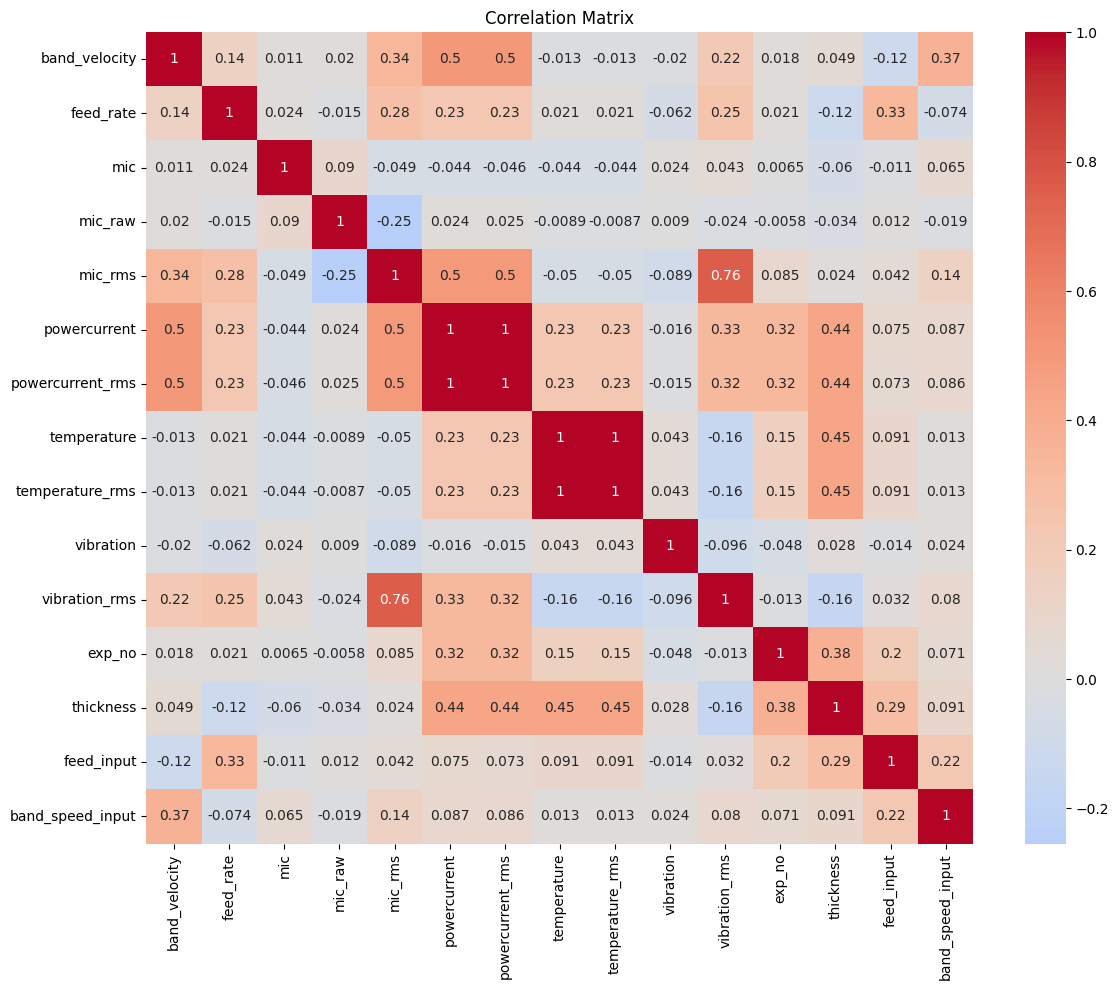

In [82]:
correlation(df_resampled_ffill)

In [83]:
importance(df_resampled_ffill)

             feature  importance
5   powercurrent_rms    0.998669
0      band_velocity    0.000306
6        temperature    0.000187
9      vibration_rms    0.000145
4            mic_rms    0.000125
7    temperature_rms    0.000120
2                mic    0.000104
13  band_speed_input    0.000102
8          vibration    0.000076
11         thickness    0.000064
10            exp_no    0.000051
12        feed_input    0.000030
1          feed_rate    0.000021
3            mic_raw    0.000001


In [84]:
df_resampled_ffill.shape

(6882, 15)

In [87]:
import pymc as pm

features_to_drop = ['powercurrent', 'powercurrent_rms', 'temperature_rms', 'mic_raw', 'mic', 'exp_no']
target_col = 'powercurrent'

X_df = df_resampled_ffill.drop(columns=features_to_drop, errors='ignore')
y_series = df_resampled_ffill[target_col]

X = X_df.values
y = y_series.values
feature_names = X_df.columns.tolist()

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y_scaled = (y - y_mean) / y_std

coords = {
    "obs_id": np.arange(len(y)),
    "features": feature_names
}

with pm.Model(coords=coords) as model:
    X_data = pm.Data("X_data", X_scaled, dims=("obs_id", "features"))
    y_data = pm.Data("y_data", y_scaled, dims="obs_id")

    alpha = pm.Normal("alpha", mu=0, sigma=1)
    
    betas = pm.Normal("betas", mu=0, sigma=1, dims="features")
    
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    mu = alpha + pm.math.dot(X_data, betas)
    
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_data, dims="obs_id")

    trace = pm.sample(draws=2000, tune=1000, target_accept=0.9)

Initializing NUTS using jitter+adapt_diag...
/home/nathanael.nussbaumer/ppl/MasterThesis/posterior_experiments/.venv/lib/python3.11/site-packages/pytensor/link/c/cmodule.py:2986: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


In [89]:
import arviz as az

summary = az.summary(trace, var_names=["betas"], kind="stats")
summary

,mean,sd,hdi_3%,hdi_97%
betas[band_velocity],0.389,0.010,0.371,0.406
betas[feed_rate],0.134,0.010,0.116,0.152
betas[mic_rms],0.267,0.013,0.243,0.291
betas[temperature],0.070,0.009,0.053,0.086
betas[vibration],0.020,0.008,0.005,0.035
betas[vibration_rms],0.098,0.012,0.075,0.121
betas[thickness],0.439,0.010,0.421,0.457
betas[feed_input],-0.044,0.010,-0.062,-0.025
betas[band_speed_input],-0.124,0.009,-0.143,-0.109


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

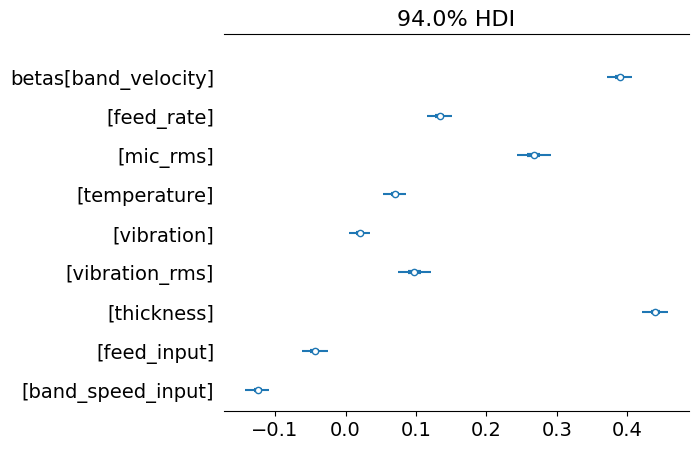

In [90]:
az.plot_forest(trace, var_names=["betas"], combined=True)

Sampling: [y_obs]


Output()

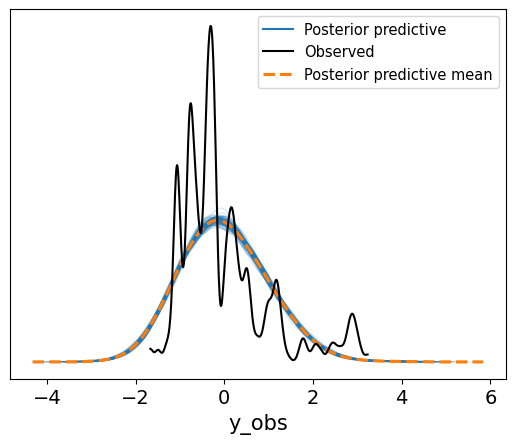

In [92]:
with model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

az.plot_ppc(trace, num_pp_samples=100);